# Face Detection and Recognition


#### Libraries Used:
The following libraries have been used in the entire code: 
1. Numpy
2. Matplotlib
3. OpenCV
4. Python Imaging Library (PIL)
5. face_recognition (This might be required to be installed through cmd/conda prompt. Prior to installing face_recognition, dlib has to be installed.) 

Steps: 
1. pip install dlib-19.8.1-cp36-cp36m-win_amd64.whl (File attached with the mail)
2. pip install face_recognition


#### Pre-trained models used:
Two pre-trained models have been used - one for face detection, and other for face recognition.
###### 1. Face-detection using Haar-Cascade classifiers:
This works on the similar grounds as CNN and uses 6000+ features which are applied in different stages in small windows during the training. I've directly used the pre-trained classifier for face by the name of 'haarcascade_frontalface_default.xml' which will have to be downloaded beforehand. For more details, visit https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html

###### 2. Face-recognition using face_recognition library:
In this we first derive feature vectors corresponding to a known image in the form of encodings and match them later with a new image. It employs dlib – a modern C++ toolkit that contains several machine learning algorithms. For more details, visit https://face-recognition.readthedocs.io/en/latest/face_recognition.html



## Code 
Functions that have been used are:
###### 1. convertToRgb -
INPUT: BGR image, OUTPUT: RGB image (converts BGR image into RGB image)

###### 2. confidence_Score - 
INPUT: Number of faces detected corresponding to min_neigbors = 5, min_neigbors corresponding to number of faces=1, OUTPUT: Confidence score for face detection (gives confidence score of face detection)

###### 3. face_detection - 
OUTPUT: image with bounding box around the predicted face and confidence score

###### 4. ROI - 
INPUT: The address of the image that users enter (img), The name by which the cropped image will get saved (name), OUTPUT: returns cropped image which consists the ROI (Region of Interest) i.e. the area where face has been detected

###### 5. task2 - 
OUTPUT: returns whether or not the two images passed are of similar person - True for Yes and False for No, confidence score of recognition 

## Code Flow

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import face_recognition
from math import sqrt

### Why haar classifier?
There are primarily two pre trained face detectors that Open CV provides:
1. HAAR Classifier
2. LBP Classifier

But it has been found that HAAR Classifier gives better accuracy over images with a little trade off with the speed as compared to when using LBP classifer.


Source: superdatascience

In [3]:
haar_face_cascade = cv2.CascadeClassifier('C:/Users/HP/Downloads/haarcascade_frontalface_default.xml')

In [4]:
def convertToRGB(BGRimg): 
    return cv2.cvtColor(BGRimg, cv2.COLOR_BGR2RGB)

### Justification of confidence score?
- There isn't any straightforward way present to calculate the confidence score as such for HAAR classifier. So I had to intutively think of some confidence score formula that could best showcase the trend of my predictions.
- After experimentally passing a lot of images through my face detection function I found that if the min_neigbors are too less there are chances of overfitting and the detector detects very small faces. If the min_neigbors are too much then the detector tends to miss out on important information, here, face. Generally min_neigbors = 5 gives the best results.
- When I passed nearly 50 images through the function it was found that if the detetcor detects 1 face corresponding to min_neigbors = 5, in all those 50 cases it had detected the correct face hence confidence score = 100%
- My general formula for calculating confidence score was 

where,
- y2 = Number of faces corresponding to when min_neigbors = 5
- y1 = number of faces = 1
- x2 = Number of min_neigbors when finally it detects 1 face
- x1 = min_neigbors = 5 because that is considered as our datum
.This is then multiplies by 3 since we're moving with a stride of 3 i.e. we're checking for every third min_neigbor


In [5]:
def confidence_Score(faces,neigbors):
    numerator = faces-1
    denominator = neigbors-5
    confidence_score = (numerator/denominator)*300
    return confidence_score
    

### Code flow (face_detection)


###### Why iterating over different min_neighbors?
This was done due to the fact that not all images can detect face when min_neighbor is set to 5. Also, to detect that one most prominent face one will have to check for different values of min_neighbor. Some might detect more than one faces in a smaller value of min_neighbor but might give accurate face if min_neigbours is increased. Sample image is shown: 
when min_neighbor is set to 5


when min_neighbor runs in a for loop and one prominent face is detected at a larger min_neighbor value


###### - len(faces) = Number of faces detected in the image
###### - len(faces) >1 : 
This might occur because the image may contain group selfies or patterns that look like faces. As we increase the number of min_neigbors the chances of predicting false positives decreases and it is able to detect the face that is most prominent in the image. Despite 50 min_neigbors if it could not detect the number of faces as 1 then we say that the face is not detectable in the image
###### - len(faces) =0: 
This might occur when there is either no image or image is in certain orientation that it is not able to detect it. I had experienced the same issue in one of the image that I had passed:

Although, I had tried tackling this issue by changing the orientaion, but couldn't implememt it properly due to lack of time. I'm providing the code for the same along with a sample example.



Evidently, the same image when rotated was able to detect a face. 


In [6]:
def face_detection(): 
    image_location = input("Enter the location of your image")
    #image_location has to be of the form - 'F:/selfie/Selfie/adhaark.jpg'
    #read the image
    test = cv2.imread(image_location)
    
    #resize the image in size 512x512
    test= cv2.resize(test, (512,512))
    
    #convert the image in grayscale
    gray_img = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
    
    #Iterating over different values of min_neigbors to find the best of them 
    for neighbors in range(5,50,3):
        faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=neighbors)
        faces_5 = len(haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5))
        
        
        if len(faces)==1:
            print ('1 face found corresponding to' , neighbors, 'neighbors')
            for (x, y, w, h) in faces:
                cv2.rectangle(test, (x, y), (x+w, y+h), (0, 255, 0), 2)
                plt.imshow(convertToRGB(test))
                plt.show()
                
                
                if neighbors==5:
                    print ('ConfidenceScore = 100%')
                    
                else:
                    print ('ConfidenceScore =' ,confidence_Score(faces_5,neighbors) , '%')
            break
            
    if len(faces)>1:
        #it is able to detect but there are more than one faces in the image
        print ("Face Undetectable. Upload another image")
        
    if len(faces)==0:
        print ("No face found")

## Code flow (ROI)
This function is to be used when face recognition is also to be performed. It works similar to the face_detetcion function but additionally stores the cropped image ( image surrounded by the bounding box) for further comparision. 



In [7]:
def ROI(img,name): 

    test = cv2.imread(img)
    test= cv2.resize(test, (512,512))
    gray_img = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
    for neighbor in range(5,50,3):
        faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=neighbor)        
        
        if len(faces)==1:

            for (x, y, w, h) in faces:
                cv2.rectangle(test, (x, y), (x+w, y+h), (0, 255, 0), 2)

                test=test[y:y+h,x:x+w]
                plt.imshow(convertToRGB(test))
                plt.show()

                test= cv2.resize(test, (222,222))
                im = Image.fromarray(test)
                img = img.replace((img.split('/')[-1]) , "")
                im.save(img+name+'.jpg')
                
                
            break
            
    if len(faces)>1:
        #it is able to detect but there are more than one faces in the image
        print ("Face Undetectable. Upload another image")
        
    if len(faces)==0:
        #it is able to detect but there are more than one faces in the image
        print ("No face found")

## Code flow (task2)
This function does the major part of comparing two images based on the feature vectors produced wrt known image. Once these encodings are compared the algorithm is able to tell the extent to which these images are similar based on the values of encodings. Confidence score is calculated based on the differences in the values of both the encodings. Here as well, the confidence score has been calculated intutively as there is not hard and fast method that exists for calculating the same.


In [18]:
def task2():
    selfie_location = input("Enter the location of your selfie")
    #selfie_location has to be of the form - 'F:/selfie/Selfie/image.jpg'
    ROI(selfie_location,'selfie')
    
    aadhar_location = input("Enter the location of your aadhar")
    #aadhar_location has to be of the form - 'F:/selfie/Selfie/image.jpg'
    ROI(aadhar_location,'aadhar')
    
    selfie_location = selfie_location.replace((selfie_location.split('/')[-1]) , "selfie.jpg")
    aadhar_location = aadhar_location.replace((aadhar_location.split('/')[-1]) , "aadhar.jpg")
    
    known_image = face_recognition.load_image_file(selfie_location)
    unknown_image = face_recognition.load_image_file(aadhar_location)

    known_encoding = face_recognition.face_encodings(known_image)[0]
    unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

    results = face_recognition.compare_faces([known_encoding], unknown_encoding)
    
    difference= known_encoding-unknown_encoding
    sum = 0
    
    for i in range(0,128):   
        sum = sum + (difference[i]*(difference[i]))

    confidence = "%.2f" % round( (100 - ((sqrt(sum/128))*100 )),2)   
    confidence= str(confidence)
    return results, ('Confidence Score = '+ confidence+'% of the prediction being correct')
    
    

Enter the location of your imageF:/selfie/Selfie/IMG_20190402_234444.jpg
1 face found corresponding to 5 neighbors


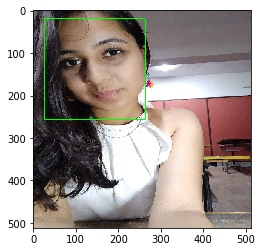

ConfidenceScore = 100%


In [13]:
face_detection()

Enter the location of your selfieF:/selfie/Selfie/IMG_20190402_234444.jpg


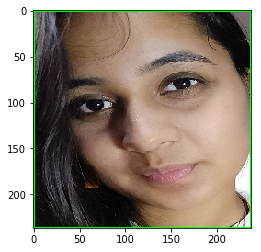

Enter the location of your aadharF:/selfie/Selfie/adhaark.jpg


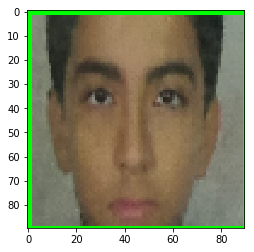

([False], 'Confidence Score = 94.29% of the prediction being correct')

In [19]:
task2()